In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import yfinance as yf


import math
import statistics
import random
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors


C:\Users\david\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
tickers = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\selected_companies.xlsx")
   
prices = pd.read_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_prices.xlsx")

In [3]:
#сделаем дату индексом 
prices.set_index("Date", inplace=True)

In [4]:
#корректировка тикеров
tickers = tickers.applymap(lambda x: x.split(".")[0] if isinstance(x, str) else x)


In [5]:
#поиск значений которых нет в prices и их загрузка

In [6]:
#flatten преобразует массив в одномерный
values_for_dawnload = list(set(tickers.values.flatten().tolist()) - set(prices.columns))

for value_for_del in values_for_dawnload:
    if isinstance(value_for_del, float):
        values_for_dawnload.remove(value_for_del)
        break

In [7]:
#загрузка недостающих данных 
company_added = yf.download(values_for_dawnload, start="2010-03-04", end="2024-01-29")["Close"]

[*********************100%%**********************]  49 of 49 completed


In [8]:
cutoff_date = pd.Timestamp('2012-05-18')

#делаю срез до заданной даты
filtered_df = company_added[company_added.index >= cutoff_date]
#список удаленных компаний
removed_columns = []

#проходжу по всем столбцам и проверяю на наличие nan значений

for column in filtered_df.columns:
    if filtered_df[column].isna().any():
        removed_columns.append(column)
        company_added.drop(column, axis=1, inplace=True)

In [9]:
#очищаю до до cutoff_date
company_added.dropna(inplace=True)

In [10]:
#добавляю отсутствующие значения 

prices = pd.merge(prices, company_added, left_index=True, right_index=True)

In [11]:
#добавляем голду неть и спишку в prices 
tick_download = ["GC=F", "BZ=F", "^GSPC"]
data = yf.download(tick_download, start="2010-03-04", end="2024-01-29")["Close"]


#переименуем названия столбцов
data.rename(columns={"GC=F":"Gold",
                     "BZ=F":"Brent",
                     "^GSPC":"SP_500"}, inplace=True)

#обьединяем фреймы

prices = pd.merge(prices, data, left_index=True, right_index=True)

[*********************100%%**********************]  3 of 3 completed


In [12]:
#удаляю Nan вэлью
prices.dropna(inplace=True)

In [24]:
tickers

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,PG,CSX,PG,PG,BDX,IEX,CSL,XYL,ELV,CTSH
1,PGR,TSN,CSL,A,SWK,A,CTSH,CTSH,BIIB,BLK
2,ROP,GOOGL,A,SCHW,MDLZ,TXRH,IEX,IEX,CBOE,TKO
3,DG,DRI,SWK,SWK,ELV,TDY,BLK,BLK,DLTR,COP
4,TDY,EXPE,ENTG,TXRH,ROP,WSO,SWK,CBOE,WMT,DOX
5,SNA,RL,TXRH,EME,DOC,CBOE,DRI,DLTR,AME,EMR
6,TFX,WMT,EXPE,EXPE,AJG,NaN,EME,TRMB,CMI,HOLX
7,RVTY,DKS,TRMB,TRMB,IFF,SNPS,NDAQ,TFX,DHR,SNA
8,SNPS,EPD,TFX,ODFL,FIS,APD,CBOE,BSX,ITT,GD
9,CF,STZ,ODFL,WBA,NDAQ,HRL,CRM,AME,APD,TROW


In [21]:
tickers.to_excel(r"C:\Users\david\Desktop\дипломная\код\data\selected_companies.xlsx")

In [22]:
#prices.to_excel(r"C:\Users\david\Desktop\дипломная\код\data\data_prices.xlsx")

In [23]:
#удаляю в тикерах значения которые не прошли проверку

tickers.replace(removed_columns, np.nan, inplace=True)

In [199]:
#сохраняю копию чтобы не прогружать все вышенаписанное заново 
prices_1 = prices.copy()

In [248]:
#даты ребалансировки 
data_rebalance = [
                 ("2015-01-10", "2015-06-15"),
                 ("2016-01-10", "2016-06-15"),
                 ("2017-01-10", "2017-06-15"),
                 ("2018-01-10", "2018-06-15"),
                 ("2019-01-10", "2019-06-15"),
                 ("2020-01-10", "2020-06-15"),
                 ("2021-01-10", "2021-06-15"),
                 ("2022-01-10", "2022-06-15"),
                 ("2023-01-10", "2023-06-15")]

#обновляю даты на существющие в prices_1
new_data_rebalance = []
for start_date, end_date in data_rebalance:
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    #получаю ближайшие даты из индекса prices_1
    nearest_start_date = get_nearest_date(start_date, prices_1.index)
    nearest_end_date = get_nearest_date(end_date, prices_1.index)
    #обновляю список
    new_data_rebalance.append((nearest_start_date, nearest_end_date))

C:\Users\david\AppData\Local\Temp\ipykernel_19204\2172020849.py:3: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  nearest_date_index = date_index.get_loc(target_date, method='nearest')


# Фукнции

In [202]:
#ДОБАВЛЕНИЕ RSI

def calculate_rsi(data, column_name, period=14):
    #расчет изм цен
    delta = data[column_name].diff()
    # Отделяю приросты и падения
    gains = (delta.where(delta > 0, 0)).fillna(0)
    losses = (-delta.where(delta < 0, 0)).fillna(0)
    # считаю экспоненциальное скользящее среднее для приростов и падений
    avg_gain = gains.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = losses.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

In [203]:
#расчет скользящего СО и корреляции доходности

def calculate_rolling_stats(data, columns, main, window=30):
    
    results = pd.DataFrame(index=data.index)
    
    # Скользящее стандартное отклонение для каждого столбца
    for column in columns:
        results[f'{column.split("_")[0]}_rolling_std'] = data[column].rolling(window=window).std()
    
    # Скользящие корреляции между парами столбцов
    for column in columns:
        if column == main:
            continue    
        col_name = f'{main.split("_")[0]}_{column.split("_")[0]}_rolling_corr'
        results[col_name] = data[main].rolling(window=window).corr(data[column])
            
    return results

In [204]:
#функция для создание окна
def create_rolling_windows(data, window_size):
    """
    X (list of np.array): Список окон, где каждое окно содержит данные из 'window_size' последовательных строк.
    """
    
    X = []
    
    for start in range(len(data) - window_size + 1):
        end = start + window_size
        window = data.iloc[start:end]
        X.append(window.values)
    
    return X

In [205]:
def choose_metric(data, threshold=0.5):
    # Вычисляем асимметрию
    skewness = skew(data)
    # Сравниваем абсолютное значение асимметрии с порогом
    if abs(skewness) > threshold:
        # Асимметрия сильно отличается от нормального распределения
        median_value = np.median(data)
        #print("Асимметрия велика, используем медиану:", median_value)
        return median_value
    else:
        # Асимметрия близка к нормальному распределению
        mean_value = np.mean(data)
        #print("Асимметрия мала, используем среднее:", mean_value)
        return mean_value


In [226]:
def get_nearest_date(target_date, date_index):
    #нахожу индекс блиашей даты
    nearest_date_index = date_index.get_loc(target_date, method='nearest')
    return date_index[nearest_date_index]

In [234]:
roll_RSI = [20, 50, 80, 110, 130]
roll_return = [10, 20, 40, 60, 80, 100]
window_sizes_std_corr = [10, 30, 40, 60, 80, 120]

In [233]:
#создаем обьекты для стандартизации наших данных 
#каждый обеькт предназначен определенной переменной

scaler_RSI = StandardScaler()
scaler_return = StandardScaler()
scaler_std = StandardScaler()
scaler_corr = StandardScaler()


# создаю обьект для сжатия данных до 2 компонент
pca = PCA(n_components=2)


#создаю обьект NearestNeighbors
knn = NearestNeighbors(n_neighbors=300, algorithm='auto')


In [206]:
tickers

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,PG,CSX,PG,PG,BDX,IEX,CSL,XYL,ELV,CTSH
1,PGR,TSN,CSL,A,SWK,A,CTSH,CTSH,BIIB,BLK
2,ROP,GOOGL,A,SCHW,MDLZ,TXRH,IEX,IEX,CBOE,TKO
3,DG,DRI,SWK,SWK,ELV,TDY,BLK,BLK,DLTR,COP
4,TDY,EXPE,ENTG,TXRH,ROP,WSO,SWK,CBOE,WMT,DOX
5,SNA,RL,TXRH,EME,DOC,CBOE,DRI,DLTR,AME,EMR
6,TFX,WMT,EXPE,EXPE,AJG,NaN,EME,TRMB,CMI,HOLX
7,RVTY,DKS,TRMB,TRMB,IFF,SNPS,NDAQ,TFX,DHR,SNA
8,SNPS,EPD,TFX,ODFL,FIS,APD,CBOE,BSX,ITT,GD
9,CF,STZ,ODFL,WBA,NDAQ,HRL,CRM,AME,APD,TROW


In [207]:
main_name = "PG"

In [208]:
#оттбираю компании которые демонтсрируют "сильную" корреляцию
indicators_factors = []

for i in prices_1.columns.tolist()[:-3]:
    if prices_1[main_name].corr(prices_1[i]) > 0.6 or prices_1[main_name].corr(prices_1[i]) < 0.6:
        indicators_factors.append(i)

In [209]:
#выбираю случайно индикатоыр команий
if len(indicators_factors) < 25:
    indicators_sample = random.sample(indicators_factors, len(indicators_factors))
else:
    indicators_sample = random.sample(indicators_factors, 25)

In [210]:
#проверка наличия рассматриваемой бумаги в списке 
if main_name not in indicators_sample:
    indicators_sample.append(main_name)

In [211]:
#добавляю голд и нефть и голд
for i in prices_1.columns[-3:].tolist():
    if i in indicators_sample:
        continue
    else:
        indicators_sample.append(i)

In [212]:
len(indicators_sample)

28

In [213]:
#беру котировки отобранных компаний
data_selected = prices_1[indicators_sample]
data_selected_1 = data_selected.copy()

In [215]:
data_selected

,VRSK,JNPR,IT,CCI,KO,PG,DFS,GIS,RMD,DKS,...,QCOM,BEN,SRE,PTC,CPB,TXRH,FBIN,Brent,Gold,SP_500
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-18,47.939999,17.340000,42.119999,53.200001,37.625000,64.190002,31.700001,39.340000,32.250000,45.330002,...,57.459999,36.256668,31.985001,20.000000,33.910000,17.309999,18.615385,107.139999,1591.599976,1295.219971
2012-05-21,47.669998,17.410000,41.230000,53.029999,37.105000,63.660000,31.520000,38.990002,31.750000,46.529999,...,55.849998,35.943333,31.924999,20.010000,33.119999,17.719999,18.897436,108.809998,1588.400024,1315.989990
2012-05-22,47.900002,17.990000,41.650002,53.480000,37.290001,63.430000,32.790001,38.549999,32.259998,46.310001,...,57.410000,36.320000,32.070000,20.860001,32.799999,17.830000,18.846153,108.410004,1576.300049,1316.630005
2012-05-23,47.810001,17.629999,41.770000,53.070000,37.000000,63.000000,31.990000,38.560001,31.959999,47.310001,...,57.500000,35.700001,31.920000,20.670000,32.520000,17.990000,18.803419,105.559998,1548.099976,1318.859985
2012-05-24,48.200001,17.270000,41.639999,53.830002,37.395000,62.490002,32.570000,38.709999,32.099998,47.500000,...,58.410000,36.153332,31.785000,20.410000,32.500000,18.070000,19.111111,106.550003,1557.300049,1320.680054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-22,241.229996,37.430000,468.760010,108.410004,59.759998,146.970001,97.750000,63.029999,174.000000,152.270004,...,152.750000,28.090000,72.910004,176.990005,43.099998,121.440002,79.459999,80.059998,2019.800049,4850.430176
2024-01-23,243.009995,37.410000,469.160004,109.010002,59.529999,153.110001,99.769997,63.389999,177.320007,150.250000,...,152.869995,28.420000,71.720001,177.919998,43.119999,121.790001,76.860001,79.550003,2023.699951,4864.600098
2024-01-24,245.000000,37.430000,470.970001,108.480003,59.799999,153.929993,100.879997,64.650002,175.470001,150.789993,...,154.789993,27.580000,72.220001,179.779999,44.209999,122.739998,75.900002,80.040001,2013.900024,4868.549805


In [216]:
# Добавление признаков 

In [217]:
#добавляю RSI С РАЗНЫМИ ЛАГАМИ
for column_RSI in data_selected_1.columns:
    for period_rsi in roll_RSI:
        rsi_series = calculate_rsi(data_selected, column_RSI, period_rsi)
        new_column_name = f'{column_RSI}_RSI_{period_rsi}'
        data_selected[new_column_name] = rsi_series
        
#УДАЛЯЕМ ПРОПУСКИ
data_selected.dropna(inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_19204\3560832728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[new_column_name] = rsi_series
C:\Users\david\AppData\Local\Temp\ipykernel_19204\3560832728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[new_column_name] = rsi_series
C:\Users\david\AppData\Local\Temp\ipykernel_19204\3560832728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

C:\Users\david\AppData\Local\Temp\ipykernel_19204\3560832728.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_selected[new_column_name] = rsi_series
C:\Users\david\AppData\Local\Temp\ipykernel_19204\3560832728.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected[new_column_name] = rsi_series
C:\Users\david\AppData\Local\Temp\ipykernel_19204\3560832728.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performan

In [218]:
data_selected

,VRSK,JNPR,IT,CCI,KO,PG,DFS,GIS,RMD,DKS,...,Gold_RSI_20,Gold_RSI_50,Gold_RSI_80,Gold_RSI_110,Gold_RSI_130,SP_500_RSI_20,SP_500_RSI_50,SP_500_RSI_80,SP_500_RSI_110,SP_500_RSI_130
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-30,49.400002,18.000000,47.869999,67.419998,37.939999,69.370003,41.529999,40.820000,41.259998,52.509998,...,46.941190,51.687813,52.869428,53.297812,53.447104,52.587842,52.494845,53.418164,53.929501,54.149117
2012-12-03,49.790001,18.100000,47.619999,67.849998,37.900002,69.839996,41.810001,41.029999,41.240002,52.480000,...,48.958489,52.497004,53.433738,53.765807,53.878615,50.520096,51.588414,52.757118,53.370362,53.629603
2012-12-04,49.990002,18.100000,47.139999,67.669998,37.310001,69.500000,41.209999,40.580002,40.759998,51.910000,...,43.872615,50.020718,51.620789,52.235704,52.459217,49.781206,51.264497,52.521089,53.170855,53.444299
2012-12-05,48.590000,17.980000,46.349998,67.190002,37.200001,69.480003,41.150002,40.689999,40.939999,51.000000,...,43.495143,49.830363,51.480409,52.116911,52.348917,50.486573,51.551730,52.719301,53.333757,53.593823
2012-12-06,49.040001,18.270000,46.520000,66.970001,37.340000,69.480003,40.869999,41.029999,40.840000,51.130001,...,45.446727,50.588272,52.002517,52.547091,52.744431,51.970490,52.153034,53.133333,53.673604,53.905580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-22,241.229996,37.430000,468.760010,108.410004,59.759998,146.970001,97.750000,63.029999,174.000000,152.270004,...,49.864197,52.583620,52.747858,52.665655,52.578351,67.457007,62.091152,59.200539,57.362237,56.467181
2024-01-23,243.009995,37.410000,469.160004,109.010002,59.529999,153.110001,99.769997,63.389999,177.320007,150.250000,...,50.647142,52.887177,52.940196,52.805997,52.697055,68.429799,62.521861,59.476943,57.561978,56.634541
2024-01-24,245.000000,37.430000,470.970001,108.480003,59.799999,153.929993,100.879997,64.650002,175.470001,150.789993,...,48.638028,52.033028,52.397464,52.411925,52.365121,68.704285,62.642584,59.554287,57.617828,56.681321


In [219]:
#пример использвоания 
"DG".endswith('_RSI')

False

In [220]:
#РАСЧЕТ ДОХОДНОСТЕЙ

daily_returns = data_selected[[col for col in data_selected.columns if "_RSI" not in col]].pct_change()
daily_returns.dropna(inplace=True)

In [221]:
#log доходность
log_returns = np.log(1 + daily_returns)
new_data = data_selected.copy()

for returns_roll in roll_return:
    #считаю доходность за период returns_roll
    rolling_returns = np.exp(log_returns.rolling(window=returns_roll).sum()) - 1
    
    #переименуем столбцы
    rename_dict = {col: f"{col}_return_{returns_roll}" for col in rolling_returns.columns}
    rolling_returns.rename(columns=rename_dict, inplace=True)
    
    # добавялю к основной таблице доходности
    new_data = pd.concat([new_data, rolling_returns], axis=1)
    new_data.dropna(inplace=True)

In [222]:
#расчет скользящего СО и корреляции доходности
columns_to_analyze = [_retur for _retur in new_data.columns if "_retur" in _retur]

for window in window_sizes_std_corr:
    rolling_stats = calculate_rolling_stats(new_data, columns_to_analyze, main_name, window=window)
    
    #переименую столцбы чтобы отражали размер окна
    rolling_stats = rolling_stats.rename(columns=lambda x: f"{x}_{window}")
    #обьединяю скользящую стат с исход данными
    new_data = pd.concat([new_data, rolling_stats], axis=1)

#удаляю пропуски
new_data.dropna(inplace=True)

In [223]:
new_data

,VRSK,JNPR,IT,CCI,KO,PG,DFS,GIS,RMD,DKS,...,PG_QCOM_rolling_corr_120,PG_BEN_rolling_corr_120,PG_SRE_rolling_corr_120,PG_PTC_rolling_corr_120,PG_CPB_rolling_corr_120,PG_TXRH_rolling_corr_120,PG_FBIN_rolling_corr_120,PG_Brent_rolling_corr_120,PG_Gold_rolling_corr_120,PG_SP_rolling_corr_120
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-28,68.510002,18.709999,60.919998,76.199997,39.020000,80.110001,51.009998,50.009998,50.740002,52.810001,...,-0.101389,0.105894,0.344905,-0.147139,0.253219,0.172896,0.093749,-0.123256,-0.123124,0.377431
2013-10-29,68.209999,18.980000,61.400002,75.839996,39.570000,81.459999,51.849998,50.770000,50.430000,53.500000,...,-0.091000,0.112098,0.393235,-0.144452,0.252294,0.162942,0.082023,-0.122560,-0.102936,0.378003
2013-10-30,68.680000,19.040001,60.959999,76.550003,39.880001,82.529999,52.740002,51.110001,51.400002,53.389999,...,-0.067547,0.114144,0.426813,-0.144895,0.243800,0.146078,0.067704,-0.100645,-0.068569,0.379296
2013-10-31,68.110001,18.660000,60.070000,76.620003,39.509998,81.199997,52.430000,50.650002,51.310001,53.209999,...,-0.048312,0.120805,0.458407,-0.144428,0.241561,0.138034,0.061574,-0.090808,-0.053318,0.381840
2013-11-01,68.790001,18.680000,59.189999,75.940002,39.570000,80.680000,51.869999,50.549999,51.570000,53.560001,...,-0.032838,0.128707,0.494694,-0.143473,0.241546,0.135825,0.062019,-0.088309,-0.041476,0.390408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-22,241.229996,37.430000,468.760010,108.410004,59.759998,146.970001,97.750000,63.029999,174.000000,152.270004,...,-0.455925,0.103864,-0.014393,0.196025,-0.230278,0.044657,0.499589,0.211953,-0.065344,0.537704
2024-01-23,243.009995,37.410000,469.160004,109.010002,59.529999,153.110001,99.769997,63.389999,177.320007,150.250000,...,-0.431279,0.103891,-0.018963,0.193704,-0.219787,0.046060,0.494022,0.208562,-0.078689,0.527692
2024-01-24,245.000000,37.430000,470.970001,108.480003,59.799999,153.929993,100.879997,64.650002,175.470001,150.789993,...,-0.400575,0.108635,-0.016541,0.199065,-0.199961,0.046777,0.486816,0.203726,-0.089251,0.516312


In [231]:
#подготовка данных к методу ближайших соседей 
data_neighbor = new_data.copy()

In [232]:
#переворачиваем табл

data_neighbor = data_neighbor.reindex(index=data_neighbor.index[::-1])

In [235]:
#сортирую признаки чтобы применить разные обьекты стандартизации
rsi_columns = [i for i in data_neighbor.columns if "_RSI" in i]
return_columns = [i for i in data_neighbor.columns if "_return" in i]
std_columns = [i for i in data_neighbor.columns if "_rolling_std" in i]
corr_columns = [i for i in data_neighbor.columns if "_rolling_corr" in i]

In [236]:
#Нормализованный фрейм
new_data_scaler = pd.DataFrame(index=data_neighbor.index)

new_data_scaler[rsi_columns] = scaler_RSI.fit_transform(data_neighbor[rsi_columns])
new_data_scaler[return_columns] = scaler_return.fit_transform(data_neighbor[return_columns])
new_data_scaler[std_columns] = scaler_std.fit_transform(data_neighbor[std_columns])
new_data_scaler[corr_columns] = scaler_corr.fit_transform(data_neighbor[corr_columns])

C:\Users\david\AppData\Local\Temp\ipykernel_19204\2980127850.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_scaler[rsi_columns] = scaler_RSI.fit_transform(data_neighbor[rsi_columns])
C:\Users\david\AppData\Local\Temp\ipykernel_19204\2980127850.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_data_scaler[rsi_columns] = scaler_RSI.fit_transform(data_neighbor[rsi_columns])
C:\Users\david\AppData\Local\Temp\ipykernel_19204\2980127850.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the 

In [239]:
#создаю наблюдения  в виде окон  
window_data = create_rolling_windows(new_data_scaler, 100)
data_matrix = np.array(window_data)
data_matrix = data_matrix.reshape(-1, data_matrix.shape[1]*data_matrix.shape[2])

In [241]:
reduced_data = pca.fit_transform(data_matrix)

In [243]:
#целевое наблюдение 
y = reduced_data[500].reshape(1, -1)

In [303]:
goal = pd.Timestamp('2016-05-18')

In [305]:
goal

Timestamp('2016-05-18 00:00:00')

In [304]:
data_neighbor.index.get_loc(goal)

1927

In [244]:
knn.fit(reduced_data)

NearestNeighbors(n_neighbors=300)

In [245]:
#в ычисление расстояний и индексов ближайших соседей
distances, indices = knn.kneighbors(y)

In [266]:
#получение лага для прогноза
predict_days = (new_data_rebalance[0][1] - new_data_rebalance[0][0]).days

In [268]:
global_distribytion = []
#не рассматриваю ближашие и слишком удаленные индексы
for idx in indices.tolist()[0][15:150]:
    #находу тек цену
    current_price = data_neighbor.iloc[:, :len(data_selected_1.columns)][main_name][idx]
    #беру дату текущей цены
    current_index = data_neighbor.iloc[:, :len(data_selected_1.columns)][main_name].index[idx]
    #беру лаг от текущего индекса
    future_index = current_index + pd.DateOffset(days = predict_days)
    # Определяем диапазон дат: от future_index - X дней до future_index + X дней
    #беру разные лаги (в отриц сторону больше) чтобы не переоценить доходнотсь и недооценить риски
    date_range = pd.date_range(start=future_index - pd.DateOffset(days=30), end=future_index + pd.DateOffset(days=10))
    # фильтрую, чтобы сохранять только те даты, которые существуют в индексе
    existing_dates = date_range[date_range.isin(data_neighbor.index)]
    #считаю доходности
    local_distribution = list((data_neighbor.loc[existing_dates, main_name] / current_price)-1)
    global_distribytion.append(local_distribution)

In [307]:
current_index

Timestamp('2023-09-28 00:00:00')

In [306]:
future_index

Timestamp('2024-03-03 00:00:00')

In [270]:
#обьединяю все доходности
distrib = [g for glob_i in global_distribytion for g in glob_i]

In [272]:
#вычисляю среднее (учитывая асимметрию)
mean_value = choose_metric(distrib)

In [273]:
mean_value

-0.04014574616974376

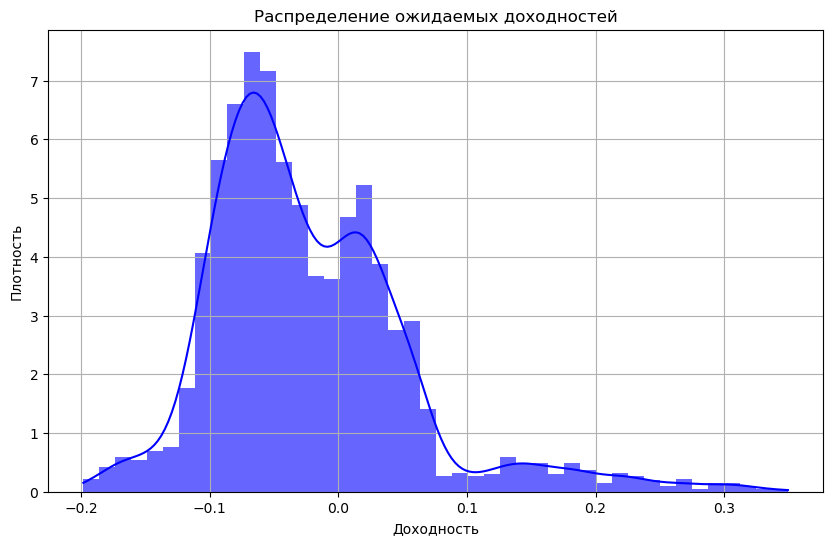

In [275]:
plt.figure(figsize=(10, 6)) 

sns.histplot(distrib, kde=True, stat="density", linewidth=0, color='blue', alpha=0.6)

plt.title('Распределение ожидаемых доходностей')  
plt.xlabel('Доходность')  
plt.ylabel('Плотность') 
plt.grid(True)  #добавиьь сетку

plt.show()

In [289]:
#для проверки нахожу фактичекую доходность
#цена на тек
local_price = data_neighbor.iloc[500, :][main_name]

In [311]:
#дуюущие цены 
#нахожу индекс столбца по имени
col_index = data_neighbor.columns.get_loc(main_name)
future_prices = data_neighbor.iloc[100 - predict_days:100 - predict_days + 10, col_index]

In [ ]:
data_neighbor.iloc[500 - predict_days:500 - predict_days + 10, col_index]

In [295]:
np.mean((future_prices / local_price)-1)

-0.1271861863754148

In [308]:
current_index 

Timestamp('2023-09-28 00:00:00')

In [309]:
current_index + pd.DateOffset(days = 150)

Timestamp('2024-02-25 00:00:00')